In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Style Visualisasi
sns.set_theme(style='whitegrid')

# --- LOAD DATASET ---
# Membaca file CSV eksternal
try:
    df = pd.read_csv('electromart.csv')
    print("Dataset Berhasil Di-load!")
    print(f"Jumlah Baris: {len(df)}")
    print(f"Jumlah Kolom: {len(df.columns)}")
except FileNotFoundError:
    print("Error: File 'electromart.csv' tidak ditemukan.")
    print("Pastikan file csv berada di folder yang sama dengan notebook ini.")

# Menampilkan 5 baris pertama untuk pengecekan
df.head()

Dataset Berhasil Di-load!
Jumlah Baris: 10000
Jumlah Kolom: 7


,order_id,product_name,city,quantity,order_date,price_per_unit,shipping_date
0,1,Keyboard Mech,Jakarta,2.0,2024-03-26,800000,2024-03-28
1,2,Headset RGB,Surabaya,2.0,2024-09-04,500000,2024-09-13
2,3,Monitor 24in,Medan,1.0,2024-08-04,2000000,2024-08-11
3,4,Headset RGB,Surabaya,4.0,2024-02-11,500000,2024-02-14
4,5,Headset RGB,Bandung,3.0,2024-07-12,500000,2024-07-21


In [189]:
# Standardisasi Nama Kota (Title Case & Strip Spasi)
df['city'] = df['city'].str.strip().str.title()

# Handling Missing Values pada Quantity (Asumsi beli 1 jika kosong)
df['quantity'] = df['quantity'].fillna(1)

# Konversi Tipe Data Tanggal
df['order_date'] = pd.to_datetime(df['order_date'])
df['shipping_date'] = pd.to_datetime(df['shipping_date'])

# Cek hasil cleaning
print("Jumlah Missing Values (Quantity):", df['quantity'].isnull().sum())
print("Daftar Kota Unik:", df['city'].unique())

Jumlah Missing Values (Quantity): 0
Daftar Kota Unik: ['Jakarta' 'Surabaya' 'Medan' 'Bandung' 'Makassar']


In [190]:
# Menghitung Total Sales (Quantity * Harga Satuan)
df['total_sales'] = df['quantity'] * df['price_per_unit']

# Menghitung Delivery Time (dalam Hari)
df['delivery_time'] = (df['shipping_date'] - df['order_date']).dt.days

# Flagging Keterlambatan (> 6 Hari)
df['is_late'] = df['delivery_time'] > 6

df[['order_id', 'total_sales', 'delivery_time', 'is_late']].head()

,order_id,total_sales,delivery_time,is_late
0,1,1600000.0,2.0,False
1,2,1000000.0,9.0,True
2,3,2000000.0,7.0,True
3,4,2000000.0,3.0,False
4,5,1500000.0,9.0,True


In [191]:
# Analisis 1: Persentase Keterlambatan
total_late = df['is_late'].sum()
total_trx = len(df)
late_percentage = (total_late / total_trx) * 100

print(f"Total Transaksi: {total_trx}")
print(f"Transaksi Terlambat (>6 hari): {total_late}")
print(f"Persentase Keterlambatan: {late_percentage:.2f}%")
print("-" * 30)

# Analisis 2: Kota dengan Omzet Tertinggi
city_performance = df.groupby('city')[['total_sales', 'delivery_time']].agg({
    'total_sales': 'sum',
    'delivery_time': 'mean'
}).sort_values(by='total_sales', ascending=False)

print("Performa Kota (Omzet Tertinggi):")
print(city_performance)

Total Transaksi: 10000
Transaksi Terlambat (>6 hari): 3050
Persentase Keterlambatan: 30.50%
------------------------------
Performa Kota (Omzet Tertinggi):
           total_sales  delivery_time
city                                 
Surabaya  2.253160e+10       4.990861
Jakarta   2.094960e+10       5.048160
Makassar  1.130385e+10       4.967400
Medan     1.044765e+10       5.057435
Bandung   9.446050e+09       5.091870


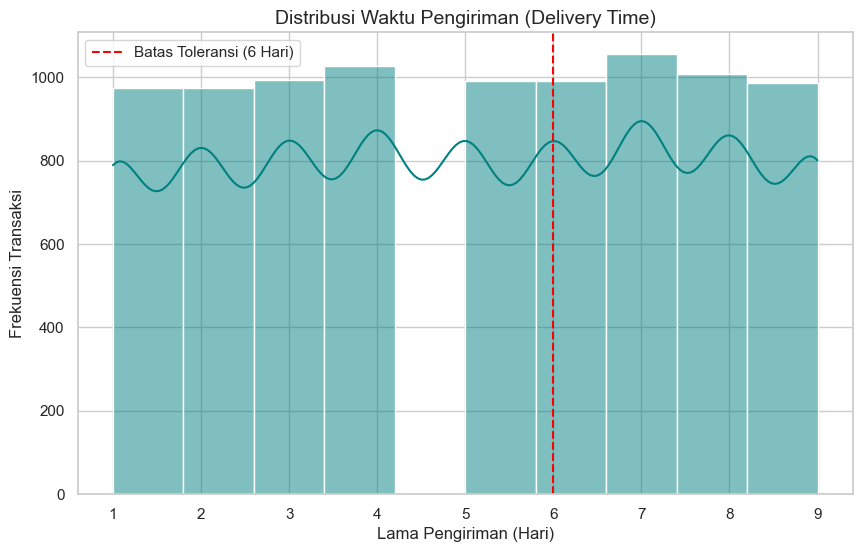

In [192]:
plt.figure(figsize=(10, 6))

# Histogram distribusi waktu pengiriman
sns.histplot(data=df, x="delivery_time", kde=True, color="teal", bins=10)

# Menambahkan garis batas toleransi (6 hari)
plt.axvline(x=6, color='red', linestyle='--', label='Batas Toleransi (6 Hari)')

plt.title("Distribusi Waktu Pengiriman (Delivery Time)", fontsize=14)
plt.xlabel("Lama Pengiriman (Hari)")
plt.ylabel("Frekuensi Transaksi")
plt.legend()
plt.show()